In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay
import joblib

In [ ]:
# Define sheet name to read data from
sheet_name1 = "vw_ChurnData"

# Load the data
df = pd.read_excel("Prediction Data.xlsx", sheet_name = sheet_name1)

In [ ]:
df.shape

(6007, 32)

In [ ]:
df.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,12210-AND,Male,66,No,Andhra Pradesh,9,31,NaN,No,No,...,Credit Card,34.299999,577.150024,0.0,0,0.0,577.150024,Stayed,Others,Others
1,12531-AND,Male,56,No,Andhra Pradesh,1,12,NaN,No,No,...,Bank Withdrawal,62.500000,4136.399902,0.0,0,0.0,4136.399902,Stayed,Others,Others
2,13500-BIH,Male,51,No,Bihar,9,18,NaN,No,No,...,Credit Card,56.400002,2928.500000,0.0,0,0.0,2928.500000,Stayed,Others,Others
3,14399-MAD,Female,56,Yes,Madhya Pradesh,8,9,NaN,No,No,...,Credit Card,35.450001,1958.949951,0.0,0,0.0,1958.949951,Stayed,Others,Others
4,14622-PUN,Female,49,Yes,Punjab,9,15,NaN,No,No,...,Bank Withdrawal,34.250000,163.550003,0.0,0,0.0,163.550003,Stayed,Others,Others


In [ ]:
# Valid category, not a missing value(NaN)
df["Value_Deal"] = df["Value_Deal"].fillna("No Deal")
df["Internet_Type"] = df["Internet_Type"].fillna("No Internet")

In [ ]:
df.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,12210-AND,Male,66,No,Andhra Pradesh,9,31,No Deal,No,No,...,Credit Card,34.299999,577.150024,0.0,0,0.0,577.150024,Stayed,Others,Others
1,12531-AND,Male,56,No,Andhra Pradesh,1,12,No Deal,No,No,...,Bank Withdrawal,62.500000,4136.399902,0.0,0,0.0,4136.399902,Stayed,Others,Others
2,13500-BIH,Male,51,No,Bihar,9,18,No Deal,No,No,...,Credit Card,56.400002,2928.500000,0.0,0,0.0,2928.500000,Stayed,Others,Others
3,14399-MAD,Female,56,Yes,Madhya Pradesh,8,9,No Deal,No,No,...,Credit Card,35.450001,1958.949951,0.0,0,0.0,1958.949951,Stayed,Others,Others
4,14622-PUN,Female,49,Yes,Punjab,9,15,No Deal,No,No,...,Bank Withdrawal,34.250000,163.550003,0.0,0,0.0,163.550003,Stayed,Others,Others


##**Data Preprocessing**

In [ ]:
# Drop the columns that won't be used for prediction
df = df.drop(["Customer_ID", "Churn_Category", "Churn_Reason"], axis = 1)

# List of columns to be Label Encoded
columns_to_encode = ["Gender", "Married", "State", "Value_Deal", "Phone_Service", "Multiple_Lines", "Internet_Service", "Internet_Type", "Online_Security",
                     "Online_Backup", "Device_Protection_Plan", "Premium_Support", "Streaming_TV", "Streaming_Movies", "Streaming_Music", "Unlimited_Data",
                     "Contract", "Paperless_Billing", "Payment_Method"]

# Encode categorical variables except the target variable
label_encoders = {}

for column in columns_to_encode:
  le = LabelEncoder()
  df[column] = le.fit_transform(df[column])
  label_encoders[column] = le

# Manually encode the target variable "Customer_Status"
df["Customer_Status"] = df["Customer_Status"].map({"Stayed": 0, "Churned": 1})

##**Data Splitting**

In [ ]:
# Separate the data into feature and target variables
X = df.drop("Customer_Status", axis = 1)
y = df["Customer_Status"]

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4805, 28) (1202, 28) (4805,) (1202,)


##**Modeling**

In [ ]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators = 300, max_depth = 10, min_samples_leaf = 5, min_samples_split = 10,
                                       max_features = "sqrt", class_weight = "balanced", n_jobs = -1, random_state = 42)

# Train the Model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, min_samples_split=10,
                       n_estimators=300, n_jobs=-1, random_state=42)

##**Model Evaluation**

In [ ]:
# Make Predictions
y_pred = rf_classifier.predict(X_test)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       862
           1       0.71      0.75      0.73       340

    accuracy                           0.84      1202
   macro avg       0.80      0.81      0.81      1202
weighted avg       0.84      0.84      0.84      1202



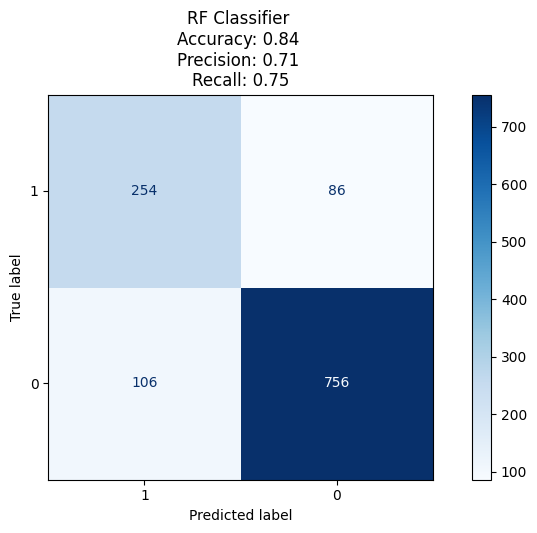

In [ ]:
# Accuracy, Precision, and Recall Scores for RF Classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division = 0)
recall = recall_score(y_test, y_pred, zero_division = 0)

# Set up the plot
fig,ax = plt.subplots(figsize = (10, 5))

# Plot the Confusion Matrix for RF Classifier
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax = ax, cmap = "Blues")
ax.set_title(f"RF Classifier \nAccuracy: {accuracy:.2f} \nPrecision: {precision:.2f} \nRecall: {recall:.2f}")
ax.invert_yaxis()
ax.invert_xaxis()

plt.show()

In [ ]:
# Overfitting check(Train vs test metrics comparison)
print("TRAIN")
print(classification_report(y_train, rf_classifier.predict(X_train)))

print("TEST")
print(classification_report(y_test, rf_classifier.predict(X_test)))

TRAIN
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      3413
           1       0.78      0.86      0.82      1392

    accuracy                           0.89      4805
   macro avg       0.86      0.88      0.87      4805
weighted avg       0.89      0.89      0.89      4805

TEST
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       862
           1       0.71      0.75      0.73       340

    accuracy                           0.84      1202
   macro avg       0.80      0.81      0.81      1202
weighted avg       0.84      0.84      0.84      1202



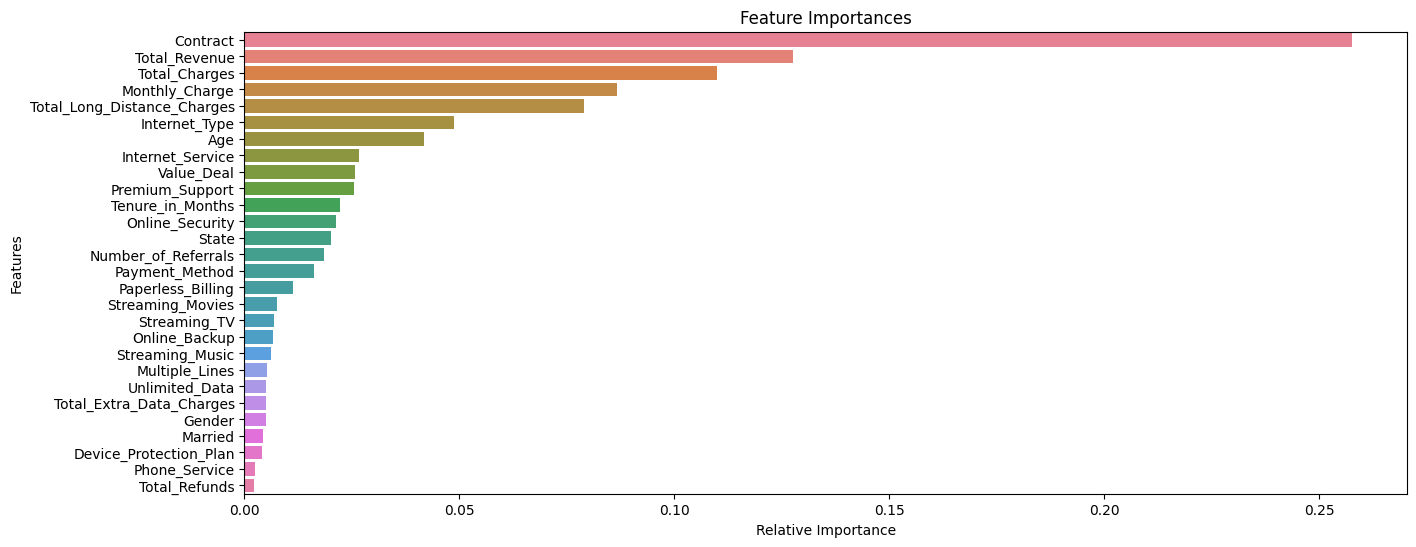

In [ ]:
# Feature selection using feature importances
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
fig,ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = importances[indices], y = X.columns[indices], hue = X.columns[indices], palette = "husl")
ax.set(
    title = "Feature Importances",
    xlabel = "Relative Importance",
    ylabel = "Features"
)
plt.show()

In [ ]:
# Comparing different thresholds
y_prob = rf_classifier.predict_proba(X_test)[:, 1]

for thr in [0.3, 0.35, 0.4, 0.45]:
    y_pred = (y_prob >= thr).astype(int)
    print(thr)
    print(classification_report(y_test, y_pred))


0.3
              precision    recall  f1-score   support

           0       0.94      0.73      0.82       862
           1       0.56      0.88      0.68       340

    accuracy                           0.77      1202
   macro avg       0.75      0.80      0.75      1202
weighted avg       0.83      0.77      0.78      1202

0.35
              precision    recall  f1-score   support

           0       0.94      0.78      0.85       862
           1       0.60      0.86      0.71       340

    accuracy                           0.80      1202
   macro avg       0.77      0.82      0.78      1202
weighted avg       0.84      0.80      0.81      1202

0.4
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       862
           1       0.63      0.81      0.71       340

    accuracy                           0.81      1202
   macro avg       0.77      0.81      0.79      1202
weighted avg       0.84      0.81      0.82      1202

0.45
 

##**Predict on New Data**

In [ ]:
# Define sheet name to read data from
sheet_name2 = "vw_JoinData"

# Load the data
new_data = pd.read_excel("Prediction Data.xlsx", sheet_name = sheet_name2)

In [ ]:
new_data.shape

(411, 32)

In [ ]:
new_data.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,12257-ASS,Female,39,No,Assam,9,1,NaN,Yes,No,...,Credit Card,19.549999,19.549999,0.0,0,10.200000,29.750000,Joined,Others,Others
1,13946-HAR,Female,41,Yes,Haryana,1,3,Deal 5,Yes,No,...,Credit Card,19.650000,19.650000,0.0,0,23.670000,43.320000,Joined,Others,Others
2,14567-TAM,Male,43,No,Tamil Nadu,1,9,NaN,Yes,No,...,Credit Card,20.350000,20.350000,0.0,0,44.090000,64.440002,Joined,Others,Others
3,15591-KAR,Female,26,No,Karnataka,3,31,NaN,Yes,No,...,Credit Card,20.400000,20.400000,0.0,0,45.910000,66.309998,Joined,Others,Others
4,15803-UTT,Female,34,No,Uttar Pradesh,6,31,NaN,Yes,No,...,Credit Card,19.150000,19.150000,0.0,0,22.370001,41.520000,Joined,Others,Others


In [ ]:
# Valid category, not a missing value(NaN)
new_data["Value_Deal"] = new_data["Value_Deal"].fillna("No Deal")
new_data["Internet_Type"] = new_data["Internet_Type"].fillna("No Internet")

In [ ]:
# Retain the original dataframe to preserve un-encoded columns
original_data = new_data.copy()

In [ ]:
# Retain the Customer_ID column
customer_ids = new_data["Customer_ID"]

In [ ]:
# Drop the columns that won't be used for prediction
new_data = new_data.drop(["Customer_ID", "Customer_Status", "Churn_Category", "Churn_Reason"], axis = 1)

In [ ]:
# Encode categorical variables using the saved label encoders
for column in new_data.select_dtypes(include = ["object"]).columns:
  new_data[column] = label_encoders[column].transform(new_data[column])

In [ ]:
# Make Predictions
y_pred_new = (rf_classifier.predict_proba(new_data)[:, 1] >= 0.45).astype(int)

In [ ]:
# Add predictions to the original dataframe
original_data["Customer_Status_Predicted"] = y_pred_new

In [ ]:
# Filter the dataframe to include only records predicted as "Churned"
original_data = original_data[original_data["Customer_Status_Predicted"] == 1]

In [ ]:
original_data

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason,Customer_Status_Predicted
0,12257-ASS,Female,39,No,Assam,9,1,No Deal,Yes,No,...,19.549999,19.549999,0.000000,0,10.200000,29.750000,Joined,Others,Others,1
1,13946-HAR,Female,41,Yes,Haryana,1,3,Deal 5,Yes,No,...,19.650000,19.650000,0.000000,0,23.670000,43.320000,Joined,Others,Others,1
2,14567-TAM,Male,43,No,Tamil Nadu,1,9,No Deal,Yes,No,...,20.350000,20.350000,0.000000,0,44.090000,64.440002,Joined,Others,Others,1
3,15591-KAR,Female,26,No,Karnataka,3,31,No Deal,Yes,No,...,20.400000,20.400000,0.000000,0,45.910000,66.309998,Joined,Others,Others,1
4,15803-UTT,Female,34,No,Uttar Pradesh,6,31,No Deal,Yes,No,...,19.150000,19.150000,0.000000,0,22.370001,41.520000,Joined,Others,Others,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,92494-MAH,Female,39,Yes,Maharashtra,11,19,No Deal,Yes,No,...,91.150002,168.500000,0.000000,10,93.559998,272.059998,Joined,Others,Others,1
405,93521-MAH,Female,55,No,Maharashtra,6,35,No Deal,Yes,No,...,-1.000000,49.299999,0.000000,10,14.970000,74.269997,Joined,Others,Others,1
406,12490-TEL,Female,52,No,Telangana,9,6,No Deal,Yes,No,...,74.750000,238.100006,38.840000,0,37.500000,236.759995,Joined,Others,Others,1
407,24754-AND,Female,63,Yes,Andhra Pradesh,0,28,No Deal,Yes,No,...,69.550003,200.199997,33.799999,0,5.010000,171.410004,Joined,Others,Others,1


In [ ]:
# Save the dataframe
original_data.to_csv("Predictions.csv", index = False)